In [1]:
!python --version

Python 3.9.16


In [2]:
# Install dependencies
%pip install -q numerapi pandas lightgbm cloudpickle pyarrow scikit-learn scipy==1.10.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
from numerapi import NumerAPI
import pandas as pd
import json
napi = NumerAPI()

# use one of the latest data versions
DATA_VERSION = "v4.3"

In [4]:
napi.download_dataset("v4.3/train_int8.parquet", "v4.3/train_int8.parquet")
napi.download_dataset("v4.3/validation_int8.parquet", "v4.3/validation_int8.parquet")
napi.download_dataset("v4.3/live_int8.parquet", "v4.3/live_int8.parquet")
napi.download_dataset("v4.3/live_example_preds.parquet", "v4.3/live_example_preds.parquet")
napi.download_dataset("v4.3/validation_example_preds.parquet", "v4.3/validation_example_preds.parquet")
napi.download_dataset("v4.3/features.json", "v4.3/features.json")
napi.download_dataset("v4.3/meta_model.parquet", "v4.3/meta_model.parquet")
napi.download_dataset("v4.3/live_benchmark_models.parquet", "v4.3/live_benchmark_models.parquet")
napi.download_dataset("v4.3/validation_benchmark_models.parquet", "v4.3/validation_benchmark_models.parquet")
napi.download_dataset("v4.3/train_benchmark_models.parquet", "v4.3/train_benchmark_models.parquet")

2024-02-17 18:25:39,199 INFO numerapi.utils: target file already exists
2024-02-17 18:25:39,199 INFO numerapi.utils: download complete
2024-02-17 18:25:40,950 INFO numerapi.utils: target file already exists
2024-02-17 18:25:40,950 INFO numerapi.utils: starting download
v4.3/validation_int8.parquet: 4.98GB [06:05, 13.6MB/s]                            
2024-02-17 18:31:48,378 INFO numerapi.utils: target file already exists
2024-02-17 18:31:48,378 INFO numerapi.utils: starting download
v4.3/live_int8.parquet: 13.2MB [00:11, 1.16MB/s]                   
2024-02-17 18:32:01,523 INFO numerapi.utils: target file already exists
2024-02-17 18:32:01,523 INFO numerapi.utils: starting download
v4.3/live_example_preds.parquet: 259kB [00:01, 226kB/s]                           
2024-02-17 18:32:04,396 INFO numerapi.utils: target file already exists
2024-02-17 18:32:04,398 INFO numerapi.utils: starting download
v4.3/validation_example_preds.parquet: 126MB [00:23, 5.41MB/s]                            


'v4.3/train_benchmark_models.parquet'

In [5]:
# Data inspection
feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
features = feature_metadata["feature_sets"]["all"] # use "all" for better performance. Requires more RAM.
train = pd.read_parquet(f"{DATA_VERSION}/train_int8.parquet", columns=["era"]+features+["target"])

In [6]:
train["era"] = train["era"].astype("int32")

### Per-era Correlations

In [7]:
target = "target"

# Create an empty DataFrame to store the results
correlations = []

# Group the data by era
grouped = train.groupby('era')

# For each era, calculate the correlation of each feature with the target
for name, group in grouped:
    corr = group.corr()['target'].drop('target')  # Calculate correlations and drop the target-target correlation
    corr.name = name  # Name the Series with the era name
    correlations.append(corr)

# Concatenate all Series into a DataFrame and transpose it
correlations = pd.concat(correlations, axis=1).T

# Print the DataFrame
print(correlations)

In [ ]:
correlations.to_csv("correlations.csv")

14

In [29]:
import matplotlib.pyplot as plt

keys = list(correlations.keys())

cumulative_corr = [sum(correlations[keys[1]][:i]) for i in range(len(correlations[keys[1]]))]

In [33]:
correlations[keys[1]][0]

nan

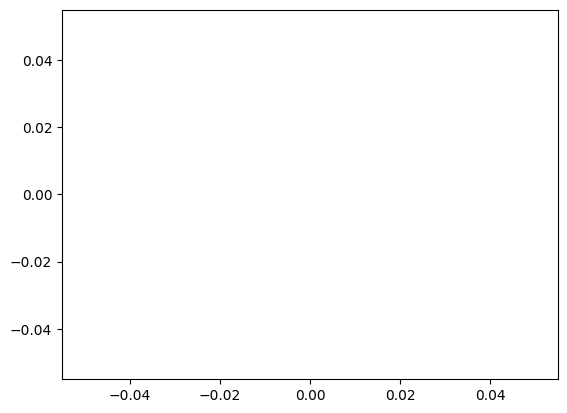

In [36]:
import numpy as np

plt.plot([0 if x is np.nan else x for x in cumulative_corr])

In [41]:
correlations[keys[1]][0] == nan

NameError: name 'nan' is not defined